In [1]:
from PIL import Image
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float32)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

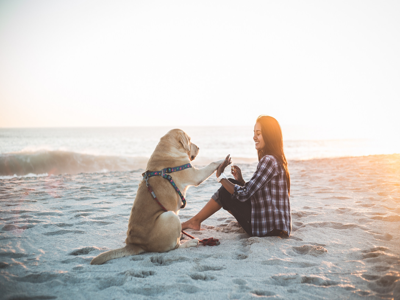

In [2]:
# Input the picture path
image_path = "./pics/demo.jpg"
image = Image.open(image_path).convert('RGB')
display(image.resize((400,300)))


In [3]:
# Image Captioning
inputs = processor(image, return_tensors="pt").to(device, torch.float32)
generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)


a woman sitting on the beach with a dog


In [4]:
# Prompted Image Captioning
prompt = "name list of all objects in the picture:"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float32)

generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)


dog and woman on the beach


In [5]:
# Visual question answering
prompt = "Question: how many dogs are in the picture? Answer:"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float32)

generated_ids = model.generate(**inputs, max_new_tokens=10)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)


none


In [6]:
# Chat
context = [
   ("What's the color of the car?", "black"),
   ("Where is the car?", "In the garage.")
]
question = "What's the color of the road?"
template = "Question: {} Answer: {}."
prompt = " ".join([template.format(context[i][0], context[i][1]) for i in range(len(context))]) + " Question: " + question + " Answer:"
print(prompt)

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float32)
generated_ids = model.generate(**inputs, max_new_tokens=10)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)



Question: What's the color of the car? Answer: black. Question: Where is the car? Answer: In the garage.. Question: What's the color of the road? Answer:
black. Question: Where is the road? Answer
